In [ ]:
4from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from math import sqrt


In [ ]:
def score(y_actual, y_pred):
  return sqrt(mean_squared_error(y_actual, y_pred))
def MCC(TP,TN,FP,FN):
  return ((TP*TN) - (FP*FN))/sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))

In [ ]:
DF=pd.read_csv('/content/gdrive/My Drive/AI_PACKAGE/creditcard.csv')

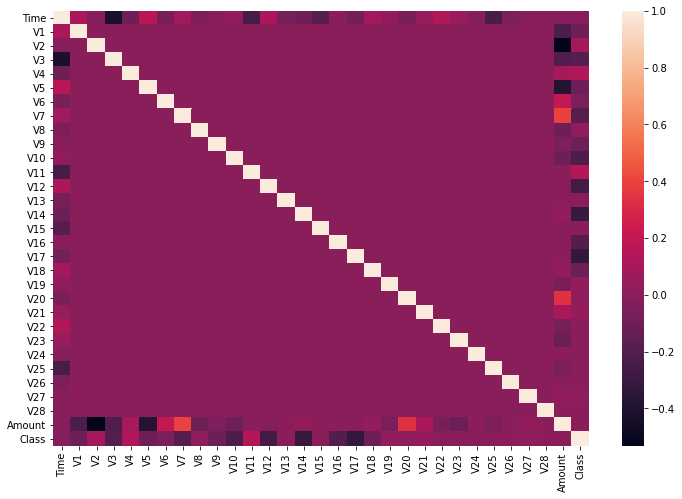

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(DF.corr())

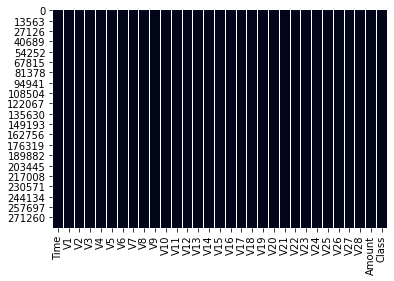

In [ ]:
sns.heatmap(DF.isnull(),cbar=False)

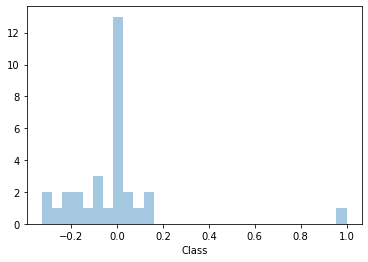

In [ ]:
sns.distplot(DF.corr()['Class'],bins=30,kde=False)

In [ ]:
cl=DF.columns

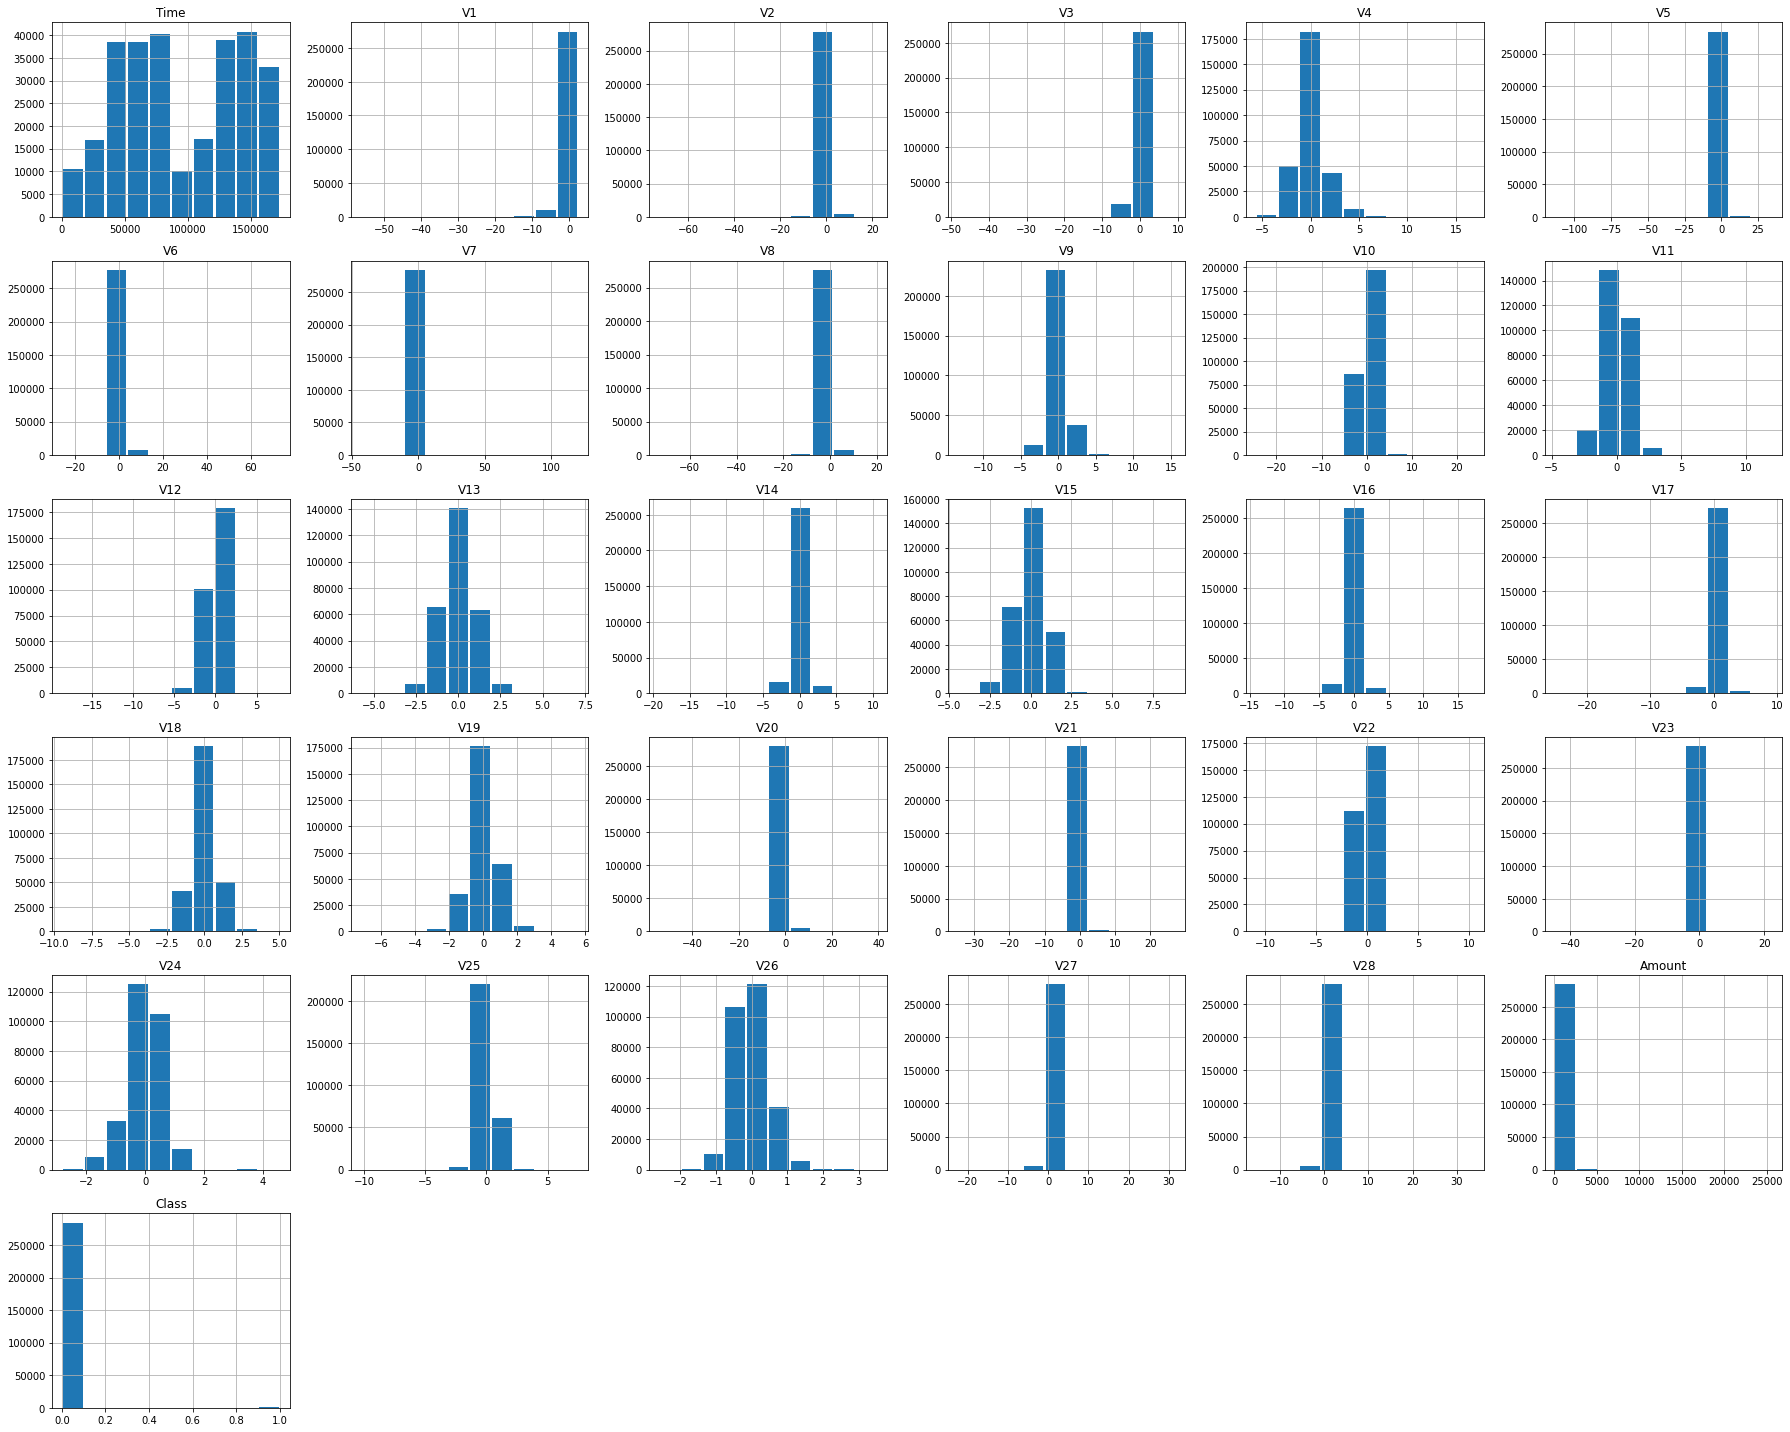

In [ ]:
DF.hist(rwidth = 0.9,figsize=(25,20))
plt.tight_layout()

In [ ]:
DF['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

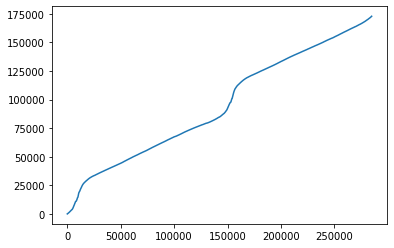

In [ ]:
DF['Time'].plot()

In [ ]:
DF['Amount'].max()

25691.16

In [ ]:
DF['Amount'].unique()

array([149.62,   2.69, 378.66, ..., 381.05, 337.54,  95.63])

In [ ]:
DF['Amount'].value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
192.63         1
218.84         1
195.52         1
793.50         1
1080.06        1
Name: Amount, Length: 32767, dtype: int64

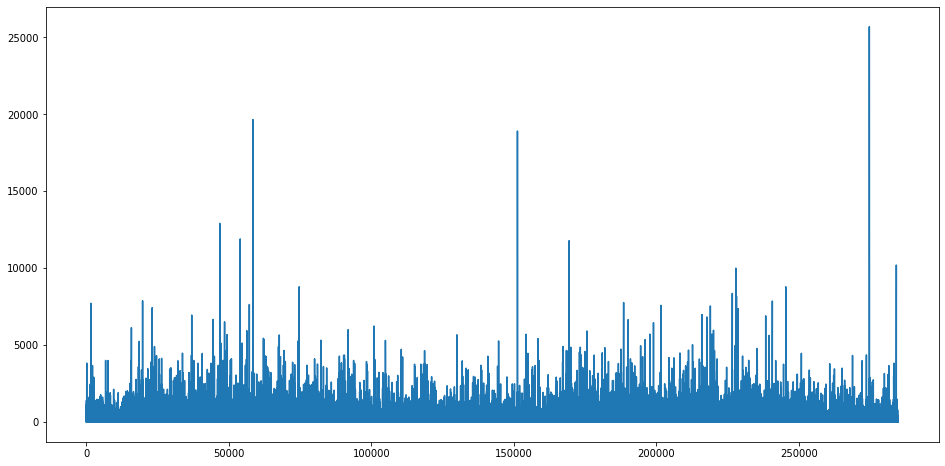

In [ ]:
plt.figure(figsize=(16,8))
DF['Amount'].plot()

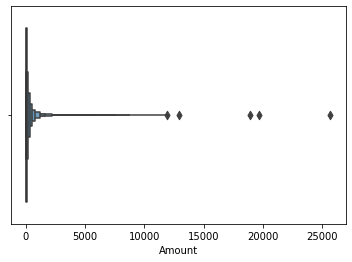

In [ ]:
sns.boxenplot(DF['Amount'],)

In [ ]:
Y=DF["Class"]
DF.drop('Class',inplace=True,axis=1)
X=DF

In [ ]:
X_train,X_valid,Y_train,Y_valid = train_test_split(X, Y, test_size=0.3, shuffle=False)

###Classification report function:

In [ ]:
def cf_report(model):
  print("Training error:",score(Y_train, model.predict(X_train)))
  print("Testing error:", score(Y_valid, model.predict(X_valid)))
  print("Accuracy:", accuracy_score(Y_valid, model.predict(X_valid)))
  C_matrix = confusion_matrix(Y_valid, model.predict(X_valid))
  accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)
  print("k_fold_Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("k_fold_Standard Deviation: {:.2f} %".format(accuracies.std()*100))
  TP= C_matrix[0][0]
  FP= C_matrix[0][1]
  FN= C_matrix[1][0]
  TN= C_matrix[1][1]
  MCC_RF=MCC(TP,TN,FP,FN)
  print("Mathewws correlation coefficinet(MCC):",MCC_RF)
  print(classification_report(Y_valid, model.predict(X_valid)))

Random forest classifier

In [ ]:
model_1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=5,bootstrap=False).fit(X_train,Y_train)

###Classification report RF:

In [ ]:
cf_report(model_1)

Training error: 0.01705652783984494
Testing error: 0.0199480851908641
Accuracy: 0.999602073897218
k_fold_Accuracy: 90.52 %
k_fold_Standard Deviation: 28.24 %
Mathewws correlation coefficinet(MCC): 0.8276635844156249
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.99      0.69      0.82       108

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443



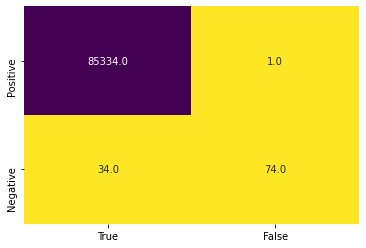

In [ ]:
sns.heatmap(confusion_matrix(Y_valid, model_1.predict(X_valid)).astype(int),annot=True,cbar=False,xticklabels=['True','False'],yticklabels=['Positive','Negative'],cmap='viridis_r',fmt='.1f')

###Decission Tree:

In [ ]:
model_2 = DecisionTreeClassifier(min_samples_leaf=5,max_depth=10).fit(X_train,Y_train)

### Classification report DT:

In [ ]:
cf_report(model_2)

Training error: 0.01913542272333974
Testing error: 0.024190606550221212
Accuracy: 0.9994148145547324
k_fold_Accuracy: 90.32 %
k_fold_Standard Deviation: 28.79 %
Mathewws correlation coefficinet(MCC): 0.7435648485023443
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.85      0.65      0.74       108

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



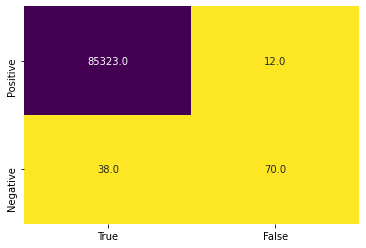

In [ ]:
sns.heatmap(confusion_matrix(Y_valid, model_2.predict(X_valid)).astype(int),annot=True,cbar=False,xticklabels=['True','False'],yticklabels=['Positive','Negative'],cmap='viridis_r',fmt='.1f')

###Naive Bayes:

In [ ]:
model_3 = GaussianNB().fit(X_train,Y_train)

###Classification report NB:

In [ ]:
cf_report(model_3)

Training error: 0.10105679429231362
Testing error: 0.09944663908359362
Accuracy: 0.9901103659749775
k_fold_Accuracy: 98.96 %
k_fold_Standard Deviation: 0.18 %
Mathewws correlation coefficinet(MCC): 0.22213927537292164
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85335
           1       0.08      0.64      0.14       108

    accuracy                           0.99     85443
   macro avg       0.54      0.81      0.57     85443
weighted avg       1.00      0.99      0.99     85443



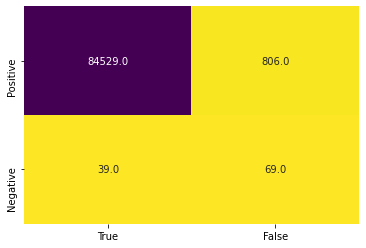

In [ ]:
sns.heatmap(confusion_matrix(Y_valid, model_3.predict(X_valid)).astype(int),annot=True,cbar=False,xticklabels=['True','False'],yticklabels=['Positive','Negative'],cmap='viridis_r',fmt='.1f')

###Gradient Boosted Tree:

In [ ]:
model_4  = GradientBoostingClassifier(n_estimators=100,max_depth=10).fit(X_train,Y_train)

###Classification report GBT:

In [ ]:
cf_report(model_4)

Training error: 0.0
Testing error: 0.0282108526202939
Accuracy: 0.999204147794436
k_fold_Accuracy: 92.46 %
k_fold_Standard Deviation: 21.94 %
Mathewws correlation coefficinet(MCC): 0.6847867554670156
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.69      0.69      0.69       108

    accuracy                           1.00     85443
   macro avg       0.84      0.84      0.84     85443
weighted avg       1.00      1.00      1.00     85443



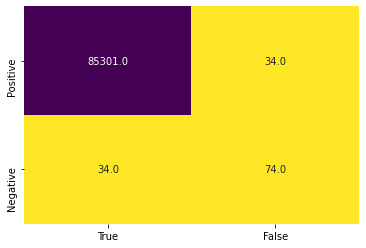

In [ ]:
sns.heatmap(confusion_matrix(Y_valid, model_4.predict(X_valid)).astype(int),annot=True,cbar=False,xticklabels=['True','False'],yticklabels=['Positive','Negative'],cmap='viridis_r',fmt='.1f')

###Support Vector Machine:

In [ ]:
model_5 =  svm.SVC(random_state=0).fit(X_train,Y_train)

Classification report SVM:

In [ ]:
cf_report(model_5)

Training error: 0.04388764151497818
Testing error: 0.03555278556988225
Accuracy: 0.998735999438222
k_fold_Accuracy: 99.81 %
k_fold_Standard Deviation: 0.00 %
Mathewws correlation coefficinet(MCC): nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.00      0.00      0.00       108

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
sns.heatmap(confusion_matrix(Y_valid, model_5.predict(X_valid)).astype(int),annot=True,cbar=False,xticklabels=['True','False'],yticklabels=['Positive','Negative'],cmap='viridis_r',fmt='.1f')

**LogisticRegression**

In [ ]:
model_6 = LogisticRegression(random_state=0).fit(X_train,Y_train,check_input=True)

**Classification report LogisticRegression:**

In [ ]:
cf_report(model_6)

In [ ]:
sns.heatmap(confusion_matrix(Y_valid, model_7.predict(X_valid)).astype(int),annot=True,cbar=False,xticklabels=['True','False'],yticklabels=['Positive','Negative'],cmap='viridis_r',fmt='.1f')

MLP Classifier:

In [ ]:
model_7 = MLPClassifier()
model_7.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

###Classification report MLP:

In [ ]:
cf_report(model_7)

Training error: 0.030708284484490787
Testing error: 0.026937519413112832
Accuracy: 0.9992743700478681


###Adaboost NB:

In [ ]:
model_8 = AdaBoostClassifier(base_estimator=GaussianNB(),algorithm='SAMME.R')
model_8.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   learning_rate=1.0, n_estimators=50, random_state=None)

###Classification report Adaboost NB:

In [ ]:
cf_report(model_8)

###Adaboost Decision Tree:



In [ ]:
model_9 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=5,max_depth=10),algorithm='SAMME.R')
model_9.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

Classification report Adaboost DT:

In [ ]:
cf_report(model_9)

###Adaboost Random forest:

In [ ]:
model_10 = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, min_samples_leaf=5,bootstrap=False),algorithm='SAMME.R')
model_10.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=False,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                      

###Classification report Adaboost RF:

In [ ]:
cf_report(model_10)

###Adaboost GBT:

In [ ]:
model_11 = AdaBoostClassifier(base_estimator=GradientBoostingClassifier(n_estimators=100,max_depth=10),algorithm='SAMME.R')
model_11.fit(X_train,Y_train)

###Classification report Adaboost GBT:

In [ ]:
cf_report(model_11)

###Adaboost MLP

In [ ]:
model_12 = AdaBoostClassifier(base_estimator =  MLPClassifier(hidden_layer_sizes=50),algorithm='SAMME.R')
model_12.fit(X_train,Y_train)

###Classification report Adaboost MLP:

In [ ]:
cf_report(model_12)

###Adaboost SVM:

In [ ]:
model_13 = AdaBoostClassifier(base_estimator = svm.SVC(random_state=0) ,algorithm='SAMME.R')
model_13.fit(X_train,Y_train)

TypeError: ignored

###Classification report Adaboost SVM:

In [ ]:
cf_report(model_13)

###Adaboost LOR:

In [ ]:
model_14 = AdaBoostClassifier(base_estimator = LogisticRegression(random_state=0) ,algorithm='SAMME.R')
model_14.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=0,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

###Classification report Adaboost LOR:

In [ ]:
cf_report(model_14)

Training error: 0.03904931522937667
Testing error: 0.037319450153196265
Accuracy: 0.9986072586402631
k_fold_Accuracy: 99.84 %
k_fold_Standard Deviation: 0.12 %
Mathewws correlation coefficinet(MCC): 0.4084084036761262
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.44      0.38      0.41       108

    accuracy                           1.00     85443
   macro avg       0.72      0.69      0.70     85443
weighted avg       1.00      1.00      1.00     85443



###Majority voting DT and GBT

In [ ]:
model_DT = DecisionTreeClassifier(min_samples_leaf=5,max_depth=10)
model_GBT = GradientBoostingClassifier(n_estimators=100,max_depth=10)
model_15 = VotingClassifier(estimators=[('DT',model_DT),('GBT',model_GBT)])
model_15.fit(X_train,Y_train)


VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=10,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=5,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
     

###Classification report DT and GBT:

In [ ]:
cf_report(model_15)

###Majority voting DT and NB:

In [ ]:
mode_NB = GaussianNB()
model_DT = DecisionTreeClassifier(min_samples_leaf=5,max_depth=10)
model_16 = VotingClassifier(estimators=[('DT',model_DT),('NB',model_NB)])

###Classification report DT and NB:

In [ ]:
cf_report(model_16)

###Majority voting NB and GBT:

In [ ]:
mode_NB = GaussianNB()
model_GBT = GradientBoostingClassifier(n_estimators=100,max_depth=10)
model_17 = VotingClassifier(estimators=[('GBT',model_GBT),('NB',model_NB)])

###Classification report NB and GBT:

In [ ]:
cf_report(model_17)

###Majority voting NB and MLP:

In [ ]:
model_NB = GaussianNB()
model_MLP = MLPClassifier(hidden_layer_sizes=50)
model_18 = VotingClassifier(estimators=[('NB',model_NB),('MLP',model_MLP)])

###Classification report NB and MLP

In [ ]:
cf_report(model_18)

###Majority voting RF and MLP:

In [ ]:
model_RF = RandomForestClassifier(n_estimators=100, min_samples_leaf=5,bootstrap=False)
model_GBT = GradientBoostingClassifier(n_estimators=100,max_depth=10)
model_19 = VotingClassifier(estimators=[('RF',model_RF),('GBT',model_GBT)])

###Classification report RF and MLP:

In [ ]:
cf_report(model_19)

NotFittedError: ignored